In [2]:
import gymnasium as gym
import pygame
import matplotlib.pyplot as plt
import numpy as np


from scipy.signal import savgol_filter

q_table = None

In [24]:
def run(episodes = 1):
    pygame.init()
    env = gym.make("FrozenLake8x8-v1", is_slippery=True, render_mode="human")
    policy = np.arange(env.action_space.n)

    action_map = {
        0: "LEFT",
        1: "DOWN",
        2: "RIGHT",
        3: "UP"
    }

    for i in range(episodes):
        state = env.reset()[0]
        print(f"Initial state is [{state // 8}, {state % 8}]")
        terminated = False
        truncated = False

        while(not terminated and not truncated):
            action = np.random.choice(policy)
            print(f"Action is {action_map[action]}]")
            new_state, reward, terminated, truncated,_ = env.step(action)

            print(f"New state is [{new_state // 8}, {new_state % 8}], reward is {reward}")

    env.close()

    pygame.quit()

In [25]:
run(episodes = 1)

Initial state is [0, 0]
Action is RIGHT]
New state is [0, 1], reward is 0.0
Action is LEFT]
New state is [0, 1], reward is 0.0
Action is RIGHT]
New state is [1, 1], reward is 0.0
Action is LEFT]
New state is [2, 1], reward is 0.0
Action is DOWN]
New state is [3, 1], reward is 0.0
Action is DOWN]
New state is [3, 0], reward is 0.0
Action is UP]
New state is [3, 1], reward is 0.0
Action is UP]
New state is [3, 2], reward is 0.0
Action is DOWN]
New state is [3, 3], reward is 0.0
Action is LEFT]
New state is [3, 2], reward is 0.0
Action is UP]
New state is [3, 1], reward is 0.0
Action is LEFT]
New state is [4, 1], reward is 0.0
Action is RIGHT]
New state is [5, 1], reward is 0.0


In [10]:
def train(episodes=4000,
          learning_rate=0.1,
          discount_factor=0.9,
          cost_of_living=0.01,
          T = 100,
          render=False,
          isSlippery = True,
          label ='base'):

    pygame.init()

    global q_table
    env = gym.make("FrozenLake8x8-v1", is_slippery = isSlippery, render_mode= 'human' if render else None)

    q_table = np.zeros([env.observation_space.n, env.action_space.n])


    epsilon = 1
    epsilon_decay = 1/(episodes * 0.9)
    random_number_generator = np.random.default_rng()
    rewards_per_episode = np.zeros(episodes)
    time_rewards_per_episode = np.zeros(episodes)
    steps_per_episode = []

    for i in range(episodes):
        state = env.reset()[0]
        steps = 0

        for step in range(T):
            if random_number_generator.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            new_state, reward, terminated, truncated,_ = env.step(action)

            if terminated & (reward == 0):
                reward = reward - 1

            if reward == 1:
                rewards_per_episode[i] = 1
                time_rewards_per_episode[i] = 1 - steps *  cost_of_living
                steps_per_episode.append(steps)
                reward = reward - cost_of_living * steps


            q_table[state, action] += reward + learning_rate * (reward + discount_factor * np.max(q_table[new_state, :]) - q_table[state, action])

            state = new_state

            steps += 1

            if terminated or truncated:
                break


        epsilon = max(epsilon - epsilon_decay, 0)

        if epsilon == 0:
            learning_rate = learning_rate * 0.1



        # print(f"Episode {i} | rewards {time_rewards_per_episode[i]} | Epsilon {epsilon}")

    env.close()
    pygame.quit()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes) :
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)


    moving_average_window = episodes // 4
    moving_averages = savgol_filter(rewards_per_episode * 100 , moving_average_window, 5)

    plt.plot(moving_averages, label=f'{label}')

    plt.ylim(0, 100)

    plt.title(label)

    plt.legend()

    print("__________________________________")

    print(f"{label}")

    mean_reward_rate = np.mean(rewards_per_episode[int(len(rewards_per_episode) * 0.9):])
    print(f"Mean reward rate: {mean_reward_rate}")

    mean_steps = np.mean(steps_per_episode[int(len(steps_per_episode) * 0.9):])
    print(f"Mean steps per success episode: {mean_steps}")




def run(episodes = 1):
    global q_table
    pygame.init()
    env = gym.make("FrozenLake8x8-v1", is_slippery=True, render_mode= 'human')

    for i in range(episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False

        while(not terminated and not truncated):
            action = np.argmax(q_table[state, :])

            new_state, reward, terminated, truncated,_ = env.step(action)

            state = new_state

    env.close()

    pygame.quit()


__________________________________
base
Mean reward rate: 0.498
Mean steps per success episode: 64.39473684210526


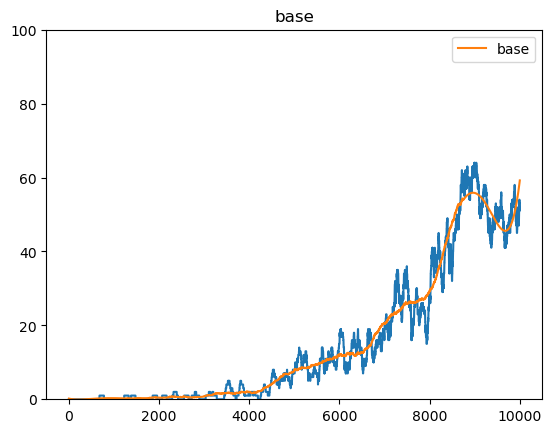

In [11]:
train(episodes=10000,learning_rate=0.05, cost_of_living=0.005, render=False)

In [3]:
run(episodes=4)


KeyboardInterrupt



In [12]:
q_table

array([[ 4.71116050e-02,  5.05570553e-02,  5.23139370e-02,
         7.49344384e-02],
       [ 5.84236889e-02,  6.90297633e-02,  9.11266185e-02,
         7.04000005e-02],
       [ 8.81198606e-02,  1.00283523e-01,  1.30249067e-01,
         9.66632515e-02],
       [ 1.24562120e-01,  1.43106338e-01,  1.94107600e-01,
         1.27620332e-01],
       [ 1.77578397e-01,  2.07978895e-01,  2.58395375e-01,
         1.96716972e-01],
       [ 2.52364432e-01,  2.71038039e-01,  3.51852535e-01,
         2.83683260e-01],
       [ 3.67955297e-01,  3.86130056e-01,  4.35165760e-01,
         3.65065489e-01],
       [ 4.57015870e-01,  4.57085327e-01,  4.64595452e-01,
         4.38171938e-01],
       [ 3.86949744e-02,  4.24399655e-02,  4.63649422e-02,
         6.22361694e-02],
       [-3.59471983e-02, -2.47139484e-02, -6.65038307e-03,
         8.08339598e-02],
       [-3.10314353e-01, -3.41089436e-01, -1.43171898e-01,
         1.06176479e-01],
       [-6.44801713e+00, -5.41304792e+00, -1.07294716e+01,
      

__________________________________
LR 0.0001
Mean reward rate: 0.0
Mean steps per success episode: 71.0
__________________________________
LR 0.01
Mean reward rate: 0.045
Mean steps per success episode: 68.33333333333333
__________________________________
LR 0.1
Mean reward rate: 0.555
Mean steps per success episode: 63.233333333333334
__________________________________
LR 0.5
Mean reward rate: 0.39
Mean steps per success episode: 63.05882352941177


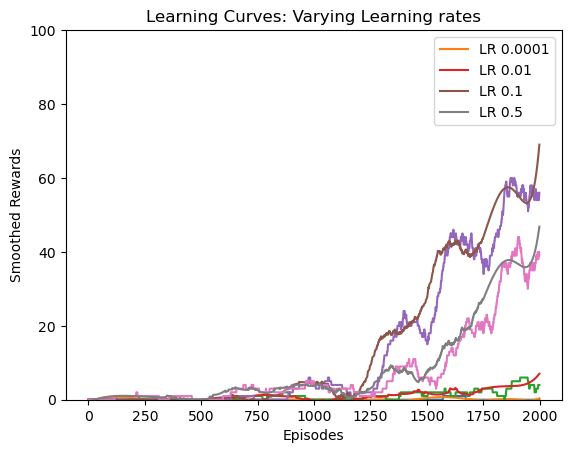

In [13]:
train(episodes=2000, learning_rate=0.0001, label="LR 0.0001")
train(episodes=2000, learning_rate=0.01, label="LR 0.01")
train(episodes=2000, learning_rate=0.1, label="LR 0.1")
train(episodes=2000, learning_rate=0.5, label="LR 0.5")

plt.title("Learning Curves: Varying Learning rates")
plt.xlabel("Episodes")
plt.ylabel("Smoothed Rewards")
plt.legend()
plt.show()


__________________________________
DF 0.99
Mean reward rate: 0.517
Mean steps per success episode: 66.1063829787234
__________________________________
DF 0.2
Mean reward rate: 0.267
Mean steps per success episode: 66.10759493670886


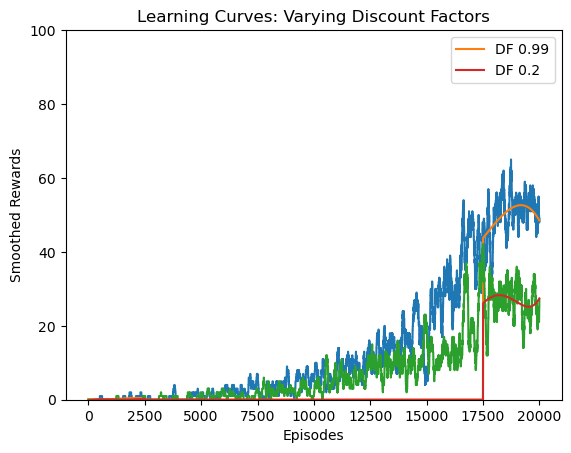

In [14]:
# Different Discount Factors
train(episodes=20000, discount_factor=0.99, label="DF 0.99")
train(episodes=20000, discount_factor=0.2, label="DF 0.2")

plt.title("Learning Curves: Varying Discount Factors")
plt.xlabel("Episodes")
plt.ylabel("Smoothed Rewards")
plt.legend()
plt.show()

__________________________________
10000 episodes
Mean reward rate: 0.428
Mean steps per success episode: 66.49557522123894
__________________________________
20000 episodes
Mean reward rate: 0.58
Mean steps per success episode: 63.181268882175225
__________________________________
40000 episodes
Mean reward rate: 0.5945
Mean steps per success episode: 63.80209895052474
__________________________________
100000 episodes
Mean reward rate: 0.5479
Mean steps per success episode: 64.19646125686394


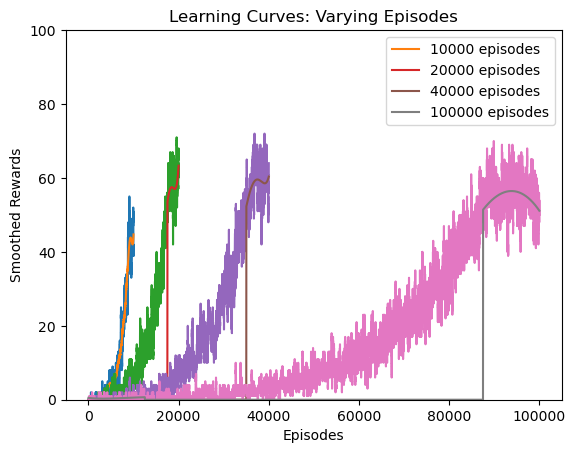

In [15]:
train(episodes=10000, learning_rate=0.01, label="10000 episodes")

train(episodes=20000, learning_rate=0.01, label="20000 episodes")

train(episodes=40000, learning_rate=0.01, label="40000 episodes")

train(episodes=100000, learning_rate=0.01, label="100000 episodes")

plt.title("Learning Curves: Varying Episodes")
plt.xlabel("Episodes")
plt.ylabel("Smoothed Rewards")
plt.legend()
plt.show()
